# Week 7, K-Nearest Neighbors

**_Author: Jessica Cervi_**

**Expected time = 2 hours**



## Assignment overview


In this assignment, you will work with k-nearest neighbors to classify wine quality using pandas, NumPy, and sklearn Python packages. You will use pandas to import the data set and convert the data into NumPy arrays to prepare it for classification using sklearn. You will then split the data set into a training data set and a test data set. From there, you will use sklearn to normalize the data sets, train the classifier, and use cross-validation to select the best k. Finally, you will evaluate the selected classifier using the test data set. 

This assignment is designed to help you apply the machine learning algorithms you have learnt using packages in Python. Python concepts, instructions, and starter code are embedded within this Jupyter Notebook to help guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.


### Learning objectives

- Outline k-nearest neighbours for classification
- Define the concept of proximity for k-nearest neighbours methods
- Convert binary and categorical predictors into numbers
- Explain the relationship between selecting k and the bias-variance trade-off
- Outline k-nearest neighbours for regression
- Discuss real-life applications of k-nearest neighbours

## Index:


#### Week 7:  K-Nearest Neighbors

- [Part 1 - Importing the data set and exploratory data analysis (EDA)](#part1)
- [Part 2 - Creating a new binary column for good_wines](#part2)
- [Part 3 - Moving the Data to NumPy arrays and splitting the data set](#part3)
- [Part 4 - Data normalisation](#part4)
- [Part 5-  Loading and training the classifier](#part5)
- [Part 6 - Evaluate and select the best classifier](#part6)
- [Part 7 - Predict the generalisation error using the test data set](#part7)



## Week 7:  K-nearest neighbors


In Week 7, you learnt about **k-nearest neighbors** (KNN) for classification. 

The KNN algorithm is one of the simplest classification algorithms. KNN is used to predict the classification of a new sample point, based on data sets that are made up of data which are separated into several classes or categories.

The pseudo-algorithm for KNN can be summarised as follows:
1. Load the training and test data 
2. Choose the value of K 
3. For each point in test data:
   - Find the Euclidean distance to all training data points
   - Store the Euclidean distances in a list and sort it 
   - Choose the first k points 
   - Assign a class to the test point based on the majority of classes present in the chosen points
4. Review ouput 

###  Predicting wine quality with k-nearest neighbors


For this exercise, we will use the data set  'sparklingwine.csv' to predict wine quality and we will build a KNN classifier in Python for the data set by following the steps given below

1. Load the data file
2. Construct a new binary column 'good wine' that indicates whether the wine is good
(which we define as having a quality of 6 or higher) or not
3. Move the data to NumPy arrays and split the data set into a training data set (first 400 samples), a validation data set (next 200 samples) and a test data set (last 200 samples)
4. Normalise the data according to the Z-score transform
5. Load and train the k-nearest neighbors classifiers for k = 1,2, ...,100
6. Evaluate each classifier using the validation data set and select the best classifier
7. Predict the generalisation error using the test data set


[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - Importing the dataset and exploratory data analysis (EDA)

We begin by using `pandas` to import the data set. To do so, we import `pandas` first and we read the file using the `.read_csv()` function by passing the name of the data set we want to read as a string.

Notice that, because the columns in the data set are separated using a `;`, we have specified the type of delimiter in the `.read_csv()` function (the default value is `,`).

Complete the code cell below adding the name of the data set inside `.read_csv()`.

In [1]:
import pandas as pd
import numpy as np

In [5]:
#read the dataset
df = pd.read_csv("sparklingwine.csv", sep = ";")

Before performing any algorithm on the dataframe, it is always good practice to perform exploratory data analysis.

We begin by visualising the first *ten* rows of the dataframe `df` using the function `.head()`. By default, `.head()` displays the first five rows of a dataframe. 

Complete the code cell below by passing the desired number of rows to the function `.head()` as an integer.


In [6]:
#visualise the first 10 rows
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,5
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Next, we retrieve some more information about our dataframe by using the properties `.shape` and `.columns` and the function `.describe()`.

Here's a brief description of what each of the above functions does:

- `.shape`: Returns a tuple representing the dimensionality of the dataframe.
- `.columns`: Returns the column labels of the dataframe.
- `.describe()`: Returns summary statistics of the columns in the dataframe provided, such as mean, count, standad deviation and so on.


Run the cells below to get information about the dataframe.

In [7]:
df.shape

(800, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,8.860750,0.539937,0.303875,2.617937,0.093080,14.946250,50.710000,0.997646,3.285337,0.674375,10.098375,5.086250
std,1.890583,0.180819,0.206469,1.262319,0.054436,9.725725,34.295205,0.001683,0.158945,0.195282,0.979967,0.494081
min,4.600000,0.180000,0.000000,1.200000,0.034000,1.000000,8.000000,0.991200,2.740000,0.330000,8.400000,4.000000
25%,7.500000,0.407500,0.120000,2.000000,0.073000,7.000000,24.000000,0.996600,3.180000,0.560000,9.400000,5.000000
50%,8.400000,0.530000,0.280000,2.300000,0.082000,12.000000,41.500000,0.997500,3.290000,0.620000,9.800000,5.000000
75%,10.000000,0.645000,0.490000,2.800000,0.094000,20.000000,66.000000,0.998650,3.380000,0.740000,10.500000,5.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.900000,7.000000


[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - Creating a new binary column for good wines

For the second step of this exercise, we will construct a new binary column `good_wine` that indicates whether a wine is good or not.

Because the values in the new column `good_wine` will be based on the values in the column `quality`, we will use the function `.apply()`, which allows us to pass a user-defined function and apply it to every single value of the pandas series (`quality` in this case). 

`.apply()` takes, at least, the Python or the `NumPy` function to apply. Additional arguments can be passed as well, a detailed description can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html).

In the code cell below, complete the definition of the function `goodwine`. Your function should take, as input, the column `quality`. Based on whether the values in `quality` are greater than or equal to six, your function should return  1 or 0 otherwise. Remember, your function should look something like the below, and you should fill in the function-name, function-input, and integer values. 

`def function-name (function-input):
    if function-input >= integer :
        return integer`

In [10]:
#complete the function goodwine
def goodwine(value):
    '''
    INPUT: column `quality`
    RETURN: 1 or 0 indicating whether
            the wine is good or not
    '''
    if value >= 6:
        return 1
    else:
        return 0
    


Next, we use the `.apply()` function to create the new column.

Complete the code in the cell below by creating a new column in the dataframe `df` called `good_wine` and by passing the function `goodwine` as an argument to the function `.apply()`.

*Hint: New columns need to be passed to the dataframe as strings. As you may remember, a string is enclosed in quotation marks like "string."*

In [11]:
#apply goodwine to `good_wine`
df['good_wine'] = df['quality'].apply(goodwine)

Run the code cell below to visualise the dataframe again. Observe that now the dataframe has a new column `good_wine`.

In [13]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
394,12.7,0.600,0.65,2.3,0.063,6.0,25.0,0.9997,3.03,0.57,9.9,5,0
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.9980,3.25,0.48,9.4,4,0
589,10.2,0.290,0.49,2.6,0.059,5.0,13.0,0.9976,3.05,0.74,10.5,6,1
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.9967,3.32,0.87,8.7,5,0
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,0
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,0
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.9991,3.39,0.62,9.4,5,0
580,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.0002,3.19,0.44,9.6,5,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.9976,3.17,0.47,10.0,5,0
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.9999,3.08,0.87,10.9,6,1


Alternatively, we could have created a new column 'good wine' by passing a lambda function to `.apply()` 

In [14]:
df['good wine'] = df.quality.apply (lambda x: 1 if x >=6 else 0)

In [15]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine,good wine
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,6,1,1
756,6.3,0.980,0.01,2.00,0.057,15.0,33.0,0.99488,3.60,0.46,11.2,5,0,0
419,6.8,0.770,0.00,1.80,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,5,0,0
646,7.3,0.670,0.05,3.60,0.107,6.0,20.0,0.99720,3.40,0.63,10.1,5,0,0
257,6.6,0.695,0.00,2.10,0.075,12.0,56.0,0.99680,3.49,0.67,9.2,5,0,0
332,8.0,0.580,0.28,3.20,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,5,0,0
290,8.7,0.520,0.09,2.50,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,5,0,0
773,7.9,0.400,0.29,1.80,0.157,1.0,44.0,0.99730,3.30,0.92,9.5,5,0,0
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.2,5,0,0
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,4,0,0


In [16]:
del df['good wine']

In [17]:
df.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
291,11.0,0.200,0.48,2.0,0.343,6.0,18.0,0.9979,3.30,0.71,10.5,5,0
629,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.9964,3.21,0.61,9.3,4,0


[Back to top](#Index:) 


<a id='part3'></a>
### Part 3 - Moving the data to NumPy arrays and splitting the data set

The KNN algorithm is implemented in the SciKit-Learn package, which takes, as inputs, `NumPy` arrays.

Now, we want to predict wine quality to complete column 13: `good_wine`. To do this, we will use all features (or columns in our dataframe) except `quality` (column 12) and `good_wine` (column 13). Hence, we will take the first 11 columns in our dataframe as features to predict the classification labels in the 13th column, `good_wine`.

- To begin, we import the `NumPy` package. Alias the package as `np`.
- We define `X` and `y` as `NumPy` arrays. So we will start with `X = np.array`.
- `X` should be a two-dimensional `NumPy` array of predictors that contains the values of the first eleven columns in `df`.
- `y` should be a one-dimensional `NumPy` array with the response variable entries of the column `good_wine`. 


In [18]:
#import numpy
import numpy as np

#define X and y 
X = np.array(df.iloc[:, :11])
y = np.array(df.iloc[:, 12])

Again, as a sanity check, it is good practice to check the dimensions of `X` and `y`. 

Run the code cells below to obtain the shapes of `X` and `y`.

In [19]:
X.shape

(800, 11)

In [20]:
y.shape

(800,)

Next, according to the instructions, we split `X` into a training data set (first 400 samples), a validation data set (next 200 samples) and a test data set (last 200 samples). Run the code cell below.

In [23]:
X_train_unproc = X[:400] 
X_val_unproc = X[400:600]
X_test_unproc = X[600:]

Complete the code cell below to split `y` in the sets `y_train`, `y_set`, and `y_test` in the way we split `X`.

In [24]:
#define y_train, y_set and y_test
y_train = y[:400]
y_val = y[400:600] 
y_test = y[600:]

[Back to top](#Index:) 


<a id='part4'></a>
### Part 4 - Data normalisation

In this part, we are going to load and train the k-nearest neighbours classifiers for k = 1,2, ...,100.

To do so, we are going to normalise the data, as the nearest neighbours classifier is sensitive to scaling. Standardisation of a data set is a common requirement for many machine learning estimators: the main idea is to normalise (mean = 0 and standard deviation = 1) your feature `X` before applying the machine learning techniques.

Although here the training and the test sets are available in advance, we are going to take a general approach: we normalise according to the training data and apply the same transformation to the test set in a consistent manner.


In the code cell below, import `.StandardScaler()` from the library `sklearn.preprocessing`. Next, use the `.StandardScaler()` function `.fit()` to compute the mean and standard deviation to be used for later scaling on the unprocessed training set `X_train_unproc`. Assign this to the variable `scaler`.

In [27]:
#import the necessary library and function
from sklearn.preprocessing import StandardScaler

#define the scaler
scaler = StandardScaler()
scaler.fit(X_train_unproc)


StandardScaler()

Next, we scale the data by using the `.transform()` function on each unproccesed feature set.

Run the cell below to obain the normalised `X` sets.

In [28]:
X_train = scaler.transform(X_train_unproc)
X_val = scaler.transform(X_val_unproc)
X_test = scaler.transform(X_test_unproc)

In [31]:
X_train_ss = pd.DataFrame(X_train, columns=df.columns[:11])
X_train_ss.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.570821,0.903848,-1.302591,-0.509848,-0.315173,-0.434997,-0.575182,0.318487,1.311878,-0.628045,-0.646278
1,-0.349197,1.933141,-1.302591,0.038165,0.027872,1.057183,0.382246,-0.295760,-0.687542,-0.095803,-0.215785
2,-0.349197,1.246946,-1.112240,-0.196698,-0.065685,-0.008660,0.005077,-0.172910,-0.300558,-0.228864,-0.215785
3,1.534609,-1.497836,1.362313,-0.509848,-0.330766,0.204509,0.179155,0.441336,-0.945532,-0.539338,-0.215785
4,-0.570821,0.903848,-1.302591,-0.509848,-0.315173,-0.434997,-0.575182,0.318487,1.311878,-0.628045,-0.646278


[Back to top](#Index:) 


<a id='part5'></a>

### Part 5-  Loading and training the classifier

To load and train the classifier, we first need to import the nearest neighbours package.
Complete the cell below by importing `KNeighborsClassifier` from the `sklearn.neighbors` package.

Next, use ``KNeighborsClassifier`` to initialise the classifier `clf`, setting k = 3. 

In [29]:
#import the necessary library and function
from sklearn.neighbors import KNeighborsClassifier

#initialise the classifier
clf = KNeighborsClassifier(n_neighbors=3)

Run the code cell below to train the classifier `clf` using `X_train` an `y_train`.

In [32]:
#train using the training sets
clf.fit(X_train , y_train) 

KNeighborsClassifier(n_neighbors=3)

For our initial choice of k = 3, we evaluate the performance of the classifier on the training data, and
we now estimate the performance on new data using the validation set, also known as the test set.

This can be achieved by using the `SciKit-learn` function `.score()`.

Compute the score on both the training and validation `X` and `y` sets.

In [33]:
#score on the training set
clf.score(X_train , y_train)


0.975

In [34]:
#score on the validation set
clf.score(X_val, y_val)

0.85

[Back to top](#Index:) 


<a id='part6'></a>

### Part 6 - Evaluate and select the best classifier


To evaluate and select the best classifier, we are going to use cross-validation to choose the value of `k` that has the most promising performance on future data.

We do so by evaluating each classifier and computing the scores using the training and the validation sets.

Define the classifier range `ks` as a sequence of integers from 1 to 100 with step 1, and define two empty lists `inSampleScores` and `valScores`.

In [35]:
#defining the range for classifiers
ks = range(1, 101)

#define the empty lists
inSampleScores = []
valScores=[]

Run the cell below to evaluate each classifier and compute the scores.

In [36]:
for k in ks:
    clf = KNeighborsClassifier(k).fit(X_train,y_train)
    inSampleScores.append(clf.score(X_train, y_train)) 
    valScores.append(clf.score(X_val,y_val))

Finally, we select the best classifier by plotting the scores for the training (in)  and the validation (out ) sets.

To do so, import `plt` from the `matplotlib.pyplot` library.

In [37]:
import matplotlib.pyplot as plt
#This command is necessary to display plots in Jupyter Notebooks
%matplotlib inline 



Run the cell below to visualise a plot with the scores for the training and validation sets.

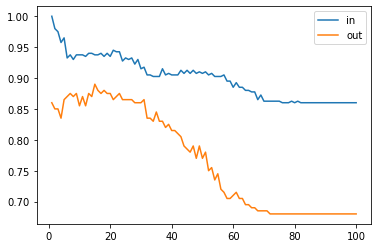

In [38]:
#Plot
p1 = plt.plot(ks, inSampleScores)
p2 = plt.plot(ks , valScores )
plt.legend(['in', 'out'], loc = 'upper right')

In analysing this plot, we see that for small values of k, the nearest neighbours classifier suffers from overfitting, whereas for large values of k, the classifer suffers from underfitting. Our plot indicates that a k around 15 is a reasonable choice. We will use this value when evaluating the selected classifier on the test set.


### Part 7 - Predict the generalisation error using the test data set.

In the last part of this exercise, we will evaluate the classifier with k = 15 on the test set.

Run the cell below, to compute the classifier for k=15 and to compute the predicted value of `y`.

In [39]:
clf = KNeighborsClassifier(15).fit(X_train , y_train) 

y_test_pred = clf.predict(X_test)

Finally, in the cell below compute the new score obtained by uning `X_test` and `y_test`. Assign the result to the variable `score_test`. 

In [40]:
score_test = clf.score(X_test, y_test)

In [41]:
score_test

0.965